In [99]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.animation as animation
from tqdm import tqdm


In [100]:
# Constants
LASER_ANGLE_RANGE = 125 # to the left and the right(in degrees)
NUMBER_OF_LASER_RAYS = 2 * LASER_ANGLE_RANGE // 2 # 2 degrees per ray
LASER_MAX_RANGE = 1200//4 # (in pixels)
PIXEL_WIDTH = 4
PIXEL_HIGHT = 4
MAP_SIZE = (400, 680) # where the first dimension if for the y-axis and the second dimension (in pixels)

In [101]:
# Read Data
def getInitialMap():
    # Read Map.jpg using skimage
    map = io.imread('Map.jpg')
    # Convert to grayscale
    map = np.mean(map, axis=2)
    # Apply threshold
    map = map < 128
    # Convert to 8-bit integer
    map = map * 255
    return map
def getInitialRobotPose():
    robotPose = np.array([10, 180, 0]) # x-coordinates, y-coordinates, angle with the x-axis in degree
    return robotPose


In [102]:
# Drawing Functions
def drawRobot(map, robotPose):
    mapY, mapX, _ = robotPose
    if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
        map[mapX, mapY] = 200
    return map
def drawLaserLines(map, robotPose):
    robotX, robotY, robotTheta = robotPose 
    for theta in range(robotTheta - LASER_ANGLE_RANGE, robotTheta + LASER_ANGLE_RANGE, 2):
        # laser range
        r = LASER_MAX_RANGE
        # laser step
        dr = 1
        for d in range(0, r, dr):
            # update the laser end point
            mapY = int(robotX + d * np.cos(theta * np.pi / 180) )
            mapX = int(robotY + d * np.sin(theta * np.pi / 180) )
            # if the laser is inside the map
            if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
                # Check if the laser hits an obstacle
                if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
                    d = r # no need to check further points
                    break
                else:
                    map[mapX, mapY] = 100  # color the laser 
    return map


In [103]:
# Display Functions
def getFigure():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.clear()  # Clears the figure to update the line, point, title, and axes
    # Adding Figure Labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig, ax
def showStaticMap(map, robotPose):
    map = drawRobot(drawLaserLines(map, robotPose), robotPose)
    fig, ax = getFigure()
    # Plot the robot
    plt.scatter(robotPose[0], robotPose[1], color='r')
    ax.set_title("Robot Pose: (%2d, %2d, %2d)" % (robotPose[0], robotPose[1], robotPose[2]))
    plt.imshow(map)
    plt.show()
def showAnimatedMap(robotPose):
    def animate(i):
        newRobotPose = robotPose.copy()
        newRobotPose[0] += i
        map = drawRobot(drawLaserLines(getInitialMap(), newRobotPose), newRobotPose)
        # map = drawRobot(map, robotPose)
        ax.clear() 
        plt.scatter(newRobotPose[0], newRobotPose[1], color='r')
        ax.set_title("Robot Pose: (%2d, %2d, %2d)" % (newRobotPose[0], newRobotPose[1], newRobotPose[2]))
        plt.imshow(map)
    # initialize the figure
    fig, ax = getFigure()
    # animation
    anim = animation.FuncAnimation(fig, animate, init_func=getInitialMap,
                               frames=MAP_SIZE[1], interval=1, blit=True,)
    plt.show()
    anim.save('map.gif', dpi=80, writer='pillow')


# Get the laser beams based on the robot pose in the map

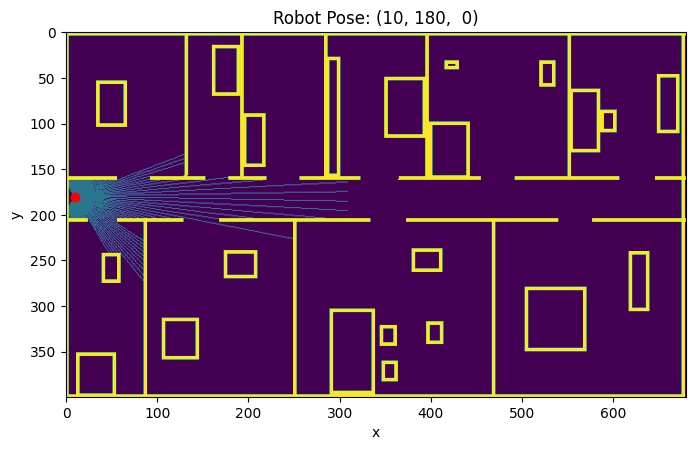

In [104]:
showStaticMap(getInitialMap(), getInitialRobotPose())

In [105]:
# showAnimatedMap(getInitialRobotPose())
# ![SegmentLocal](map.gif "map")

In [106]:
# Get rays from pose
def getRays(map, robotPose):
    laserRays = [LASER_MAX_RANGE]* NUMBER_OF_LASER_RAYS  # the default is the max range of rays
    laserPoints = {}
    robotX, robotY, robotTheta = robotPose 
    for rayIdx, theta in enumerate(range(robotTheta - LASER_ANGLE_RANGE, robotTheta + LASER_ANGLE_RANGE, 2)):
        # laser range, laser step
        r, dr = LASER_MAX_RANGE, 1
        for d in range(0, r, dr):
            # update the laser end point
            mapY = int(robotX + d * np.cos(theta * np.pi / 180))
            mapX = int(robotY + d * np.sin(theta * np.pi / 180))
            # if the laser is inside the map
            if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
                laserPoints[(robotX, robotY, theta)] = (mapX, mapY)
                # Check if the laser hits an obstacle
                if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
                    laserRays[rayIdx] = d
                    d = r # no need to check further points
                    break
                else:
                    map[mapX, mapY] = 100  # color the laser 
    return laserRays, laserPoints
rays, points = getRays(getInitialMap(), getInitialRobotPose())
print(rays)
print(points)

[13, 13, 14, 15, 16, 17, 18, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 24, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 38, 40, 43, 47, 129, 127, 126, 85, 85, 95, 116, 170, 207, 300, 300, 300, 300, 276, 197, 160, 244, 107, 93, 83, 74, 67, 62, 57, 53, 53, 54, 90, 92, 94, 97, 100, 103, 107, 110, 115, 120, 78, 76, 74, 73, 28, 27, 27, 27, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 20, 18, 17, 16, 15, 14, 13]
{(10, 180, -125): (169, 2), (10, 180, -123): (169, 2), (10, 180, -121): (167, 2), (10, 180, -119): (166, 2), (10, 180, -117): (165, 2), (10, 180, -115): (164, 2), (10, 180, -113): (163, 2), (10, 180, -111): (161, 2), (10, 180, -109): (161, 3), (10, 180, -107): (161, 4), (10, 180, -105): (161, 5), (10, 180, -103): (161, 5), (10, 180, -101): (161, 6), (10, 180, -99): (161, 7), (10, 180, -97): (161, 7), (10, 180, -95): (161, 8), (10, 180, -93): (161, 9), (10, 180, -91): (161, 

In [107]:
allPoints = {}
map = getInitialMap()
for x in tqdm(range(map.shape[0]//20)):
    for y in range(map.shape[1]//20):
        for theta in range(0, 360, 180):
            _, points = getRays(getInitialMap(), (x, y, theta))
            allPoints= dict(points)
print(len(allPoints))
print(allPoints)


100%|██████████| 20/20 [00:20<00:00,  1.05s/it]

125
{(19, 33, 55): (53, 33), (19, 33, 57): (54, 33), (19, 33, 59): (57, 33), (19, 33, 61): (58, 33), (19, 33, 63): (60, 33), (19, 33, 65): (63, 33), (19, 33, 67): (66, 33), (19, 33, 69): (70, 33), (19, 33, 71): (74, 33), (19, 33, 73): (78, 33), (19, 33, 75): (86, 33), (19, 33, 77): (94, 33), (19, 33, 79): (158, 43), (19, 33, 81): (158, 38), (19, 33, 83): (158, 34), (19, 33, 85): (158, 29), (19, 33, 87): (158, 25), (19, 33, 89): (158, 21), (19, 33, 91): (158, 16), (19, 33, 93): (158, 12), (19, 33, 95): (158, 8), (19, 33, 97): (158, 3), (19, 33, 99): (134, 2), (19, 33, 101): (115, 2), (19, 33, 103): (103, 2), (19, 33, 105): (92, 2), (19, 33, 107): (85, 2), (19, 33, 109): (80, 2), (19, 33, 111): (75, 2), (19, 33, 113): (70, 2), (19, 33, 115): (67, 2), (19, 33, 117): (65, 2), (19, 33, 119): (62, 2), (19, 33, 121): (60, 2), (19, 33, 123): (58, 2), (19, 33, 125): (55, 2), (19, 33, 127): (54, 2), (19, 33, 129): (53, 2), (19, 33, 131): (51, 2), (19, 33, 133): (50, 2), (19, 33, 135): (49, 2), (

In [108]:
# # Get the likelihood from the rays
# def getLikelihoodFromRays(map, rays):
#     def getEndPoint(rayStart, rayLength, theta):
#         r, dr = rayLength, 1
#         for d in range(0, r, dr):
#             # update the laser end point
#             mapY = int(rayStart[0] + d * np.cos(theta * np.pi / 180))
#             mapX = int(rayStart[1] + d * np.sin(theta * np.pi / 180))
#             # if the laser is inside the map
#             if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
#                 # Check if the laser hits an obstacle
#                 if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
#                     return mapX, mapY
#         # Return max range if no obstacle is found
#         mapY = int(rayStart[0] + r * np.cos(theta * np.pi / 180))
#         mapX = int(rayStart[1] + r * np.sin(theta * np.pi / 180))
#         return mapX, mapY

#     likelihood = np.ones(map.shape)
#     # iterate over the rays
#     for ray in tqdm(rays):
#         # iterate over the map 
#         for x in tqdm(range(map.shape[0])):
#             for y in tqdm(range(map.shape[1])):
#                 # iterate over all the possible angles 
#                 for theta in range(0, 360):
#                     endPoint = getEndPoint((x, y), rays[ray], theta)
#                     if (endPoint[0] >= 0 and endPoint[0] < map.shape[0] and endPoint[1] >= 0 and endPoint[1] < map.shape[1]):
#                         likelihood[endPoint[0], endPoint[1]]*=0.9      
#     return likelihood
# likelihood = getLikelihoodFromRays(getInitialMap(), rays)
# print(likelihood)

# plt.imshow(likelihood)
# plt.show()

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


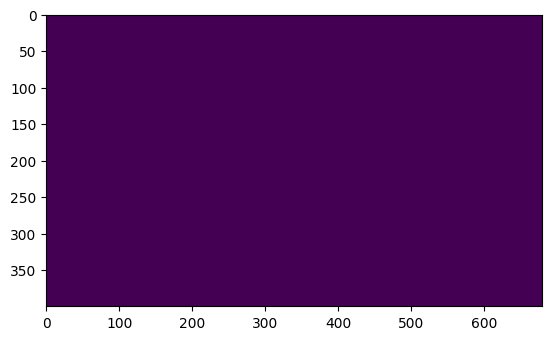

In [109]:
# Get the likelihood from the rays
def getLikelihoodFromRays(map, rays):
    likelihood = np.ones(map.shape)
    # iterate over the rays
    # for ray in tqdm(rays):
    #     # iterate over the map 
    #     for x in range(map.shape[0]):
    #         for y in range(map.shape[1]):
    #             # iterate over all the possible angles 
    #             for theta in range(0, 360):
    #              pass
    return likelihood
likelihood = getLikelihoodFromRays(getInitialMap(), rays)
print(likelihood)

plt.imshow(likelihood)
plt.show()